# 01 Project

*Louise Holst Andersen* | *The Lede Program* | *July, 2024*

**Air temperature.**

## Is climate change eating away at Tromsø's skiing season?
I want to find out if there is less snow in Tromsø, a town of 80,000 people in the Arctic part of Norway - and my home - than there used to be.

This notebook is only for retrieving and analysing **AIR TEMPERATURE** data from the [Frost API](https://frost.met.no/index.html) made available by *Meteorologisk institutt*, the Norwegian weather organisation.

The original notebook is called **01-project-snowdepth**.

### Initial setup

In [114]:
import requests
import pandas as pd

In [115]:
from dotenv import load_dotenv
import os

load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")

In [116]:
# Let's put the endpoint into a variable
url = 'https://frost.met.no/observations/v0.jsonld'

### Get data

In [117]:
# Define the repeating time interval with no gaps for each year from 1988 to 2024
interval_start = "1924-10-01"
interval_end = "1925-06-01"
repetitions = 100  # number of repetitions
period = "P1Y"  # period of 1 year

referencetime = f"R{repetitions}/{interval_start}/{interval_end}/{period}"

# Set parametres for the API call
parametres = {
    'sources': 'SN90450', # Tromsø
    'elements': 'mean(air_temperature P1M)', # this is the air temperature weather element
    'referencetime': referencetime,
    'timeoffsets': 'PT0H', # to make sure we only have one data point for every month
}

# Get the endpoint, parametres and client ID
response = requests.get(url, parametres, auth=(CLIENT_ID,''))

# Convert the JSON to a dictionary
json = response.json()

# Check if it worked
if response.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % response.status_code)
    print('Message: %s' % json['error']['message'])

Data retrieved from frost.met.no!


In [118]:
data[-1]

{'sourceId': 'SN90450:0',
 'referenceTime': '2024-05-01T00:00:00.000Z',
 'observations': [{'elementId': 'mean(air_temperature P1M)',
   'value': 7.1,
   'unit': 'degC',
   'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
   'timeOffset': 'PT0H',
   'timeResolution': 'P1M',
   'timeSeriesId': 0,
   'performanceCategory': 'C',
   'exposureCategory': '2',
   'qualityCode': 2}]}

In [119]:
data[0]

{'sourceId': 'SN90450:0',
 'referenceTime': '1924-10-01T00:00:00.000Z',
 'observations': [{'elementId': 'mean(air_temperature P1M)',
   'value': 5.6,
   'unit': 'degC',
   'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
   'timeOffset': 'PT0H',
   'timeResolution': 'P1M',
   'timeSeriesId': 0,
   'performanceCategory': 'C',
   'exposureCategory': '2',
   'qualityCode': 2}]}

### Turn it into a DataFrame

In [120]:
# Initialize an empty list to store individual DataFrames
df_list = []

# Convert JSON data to a pandas DataFrame
for entry in data:
    row = pd.DataFrame(entry['observations'])
    row['referenceTime'] = entry['referenceTime']
    row['sourceId'] = entry['sourceId']
    df_list.append(row)

# Concatenate all DataFrames in the list
df = pd.concat(df_list, ignore_index=True)

In [121]:
df.head()

,elementId,value,unit,level,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime,sourceId
0,mean(air_temperature P1M),5.6,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1M,0,C,2,2,1924-10-01T00:00:00.000Z,SN90450:0
1,mean(air_temperature P1M),0.1,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1M,0,C,2,2,1924-11-01T00:00:00.000Z,SN90450:0
2,mean(air_temperature P1M),-0.6,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1M,0,C,2,2,1924-12-01T00:00:00.000Z,SN90450:0
3,mean(air_temperature P1M),0.4,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1M,0,C,2,2,1925-01-01T00:00:00.000Z,SN90450:0
4,mean(air_temperature P1M),-2.9,degC,"{'levelType': 'height_above_ground', 'unit': '...",PT0H,P1M,0,C,2,2,1925-02-01T00:00:00.000Z,SN90450:0


#### Remove some columns

In [122]:
# These additional columns will be kept
columns = ['sourceId','referenceTime','elementId','value','unit','timeOffset','timeResolution']
df2 = df[columns].copy()

# Convert the time value to something Python understands
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'])

In [123]:
df2.head()

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution
0,SN90450:0,1924-10-01 00:00:00+00:00,mean(air_temperature P1M),5.6,degC,PT0H,P1M
1,SN90450:0,1924-11-01 00:00:00+00:00,mean(air_temperature P1M),0.1,degC,PT0H,P1M
2,SN90450:0,1924-12-01 00:00:00+00:00,mean(air_temperature P1M),-0.6,degC,PT0H,P1M
3,SN90450:0,1925-01-01 00:00:00+00:00,mean(air_temperature P1M),0.4,degC,PT0H,P1M
4,SN90450:0,1925-02-01 00:00:00+00:00,mean(air_temperature P1M),-2.9,degC,PT0H,P1M


In [124]:
df2.tail()

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution
795,SN90450:0,2024-01-01 00:00:00+00:00,mean(air_temperature P1M),-4.0,degC,PT0H,P1M
796,SN90450:0,2024-02-01 00:00:00+00:00,mean(air_temperature P1M),-2.5,degC,PT0H,P1M
797,SN90450:0,2024-03-01 00:00:00+00:00,mean(air_temperature P1M),-0.4,degC,PT0H,P1M
798,SN90450:0,2024-04-01 00:00:00+00:00,mean(air_temperature P1M),0.4,degC,PT0H,P1M
799,SN90450:0,2024-05-01 00:00:00+00:00,mean(air_temperature P1M),7.1,degC,PT0H,P1M


### Data analysis

#### Initial summary stats

In [125]:
df2.describe()

,value
count,800.000000
mean,-0.560500
std,3.374604
min,-9.500000
25%,-3.100000
50%,-0.800000
75%,1.800000
max,9.100000


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sourceId        800 non-null    object             
 1   referenceTime   800 non-null    datetime64[ns, UTC]
 2   elementId       800 non-null    object             
 3   value           800 non-null    float64            
 4   unit            800 non-null    object             
 5   timeOffset      800 non-null    object             
 6   timeResolution  800 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 43.9+ KB


<Axes: title={'center': 'Mean Air Temperature Over Time'}, xlabel='Reference Time', ylabel='Mean Air Temperature (°C)'>

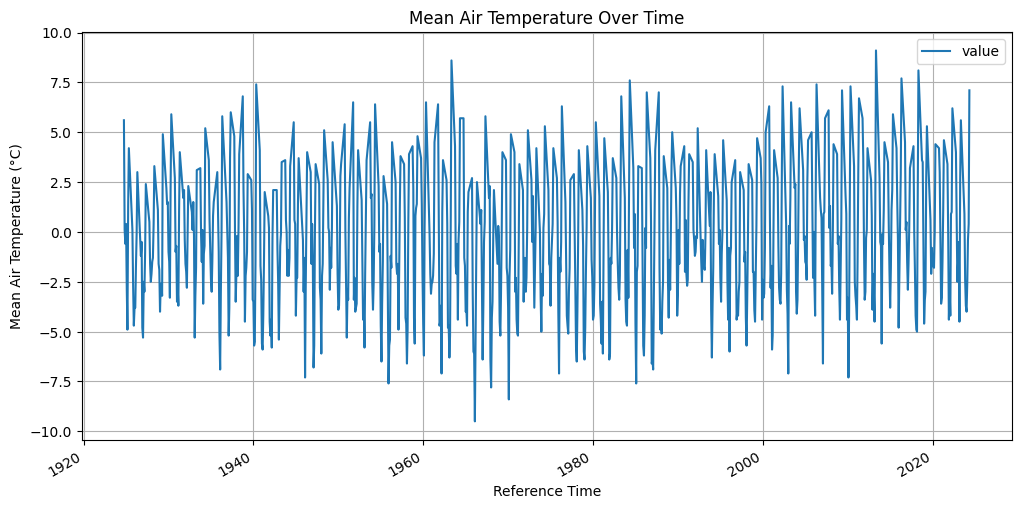

In [127]:
df2.plot(
        x='referenceTime', 
        y='value', 
        kind='line', 
        grid=True,
        figsize=(12, 6), 
        title='Mean Air Temperature Over Time', 
        xlabel='Reference Time', 
        ylabel='Mean Air Temperature (°C)'
       )

In [128]:
df2['month'] = df2['referenceTime'].dt.month_name()
df2.tail()

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month
795,SN90450:0,2024-01-01 00:00:00+00:00,mean(air_temperature P1M),-4.0,degC,PT0H,P1M,January
796,SN90450:0,2024-02-01 00:00:00+00:00,mean(air_temperature P1M),-2.5,degC,PT0H,P1M,February
797,SN90450:0,2024-03-01 00:00:00+00:00,mean(air_temperature P1M),-0.4,degC,PT0H,P1M,March
798,SN90450:0,2024-04-01 00:00:00+00:00,mean(air_temperature P1M),0.4,degC,PT0H,P1M,April
799,SN90450:0,2024-05-01 00:00:00+00:00,mean(air_temperature P1M),7.1,degC,PT0H,P1M,May


In [129]:
df2[390:410]

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month
390,SN90450:0,1973-04-01 00:00:00+00:00,mean(air_temperature P1M),0.2,degC,PT0H,P1M,April
391,SN90450:0,1973-05-01 00:00:00+00:00,mean(air_temperature P1M),4.2,degC,PT0H,P1M,May
392,SN90450:0,1973-10-01 00:00:00+00:00,mean(air_temperature P1M),0.0,degC,PT0H,P1M,October
393,SN90450:0,1973-11-01 00:00:00+00:00,mean(air_temperature P1M),-3.3,degC,PT0H,P1M,November
394,SN90450:0,1973-12-01 00:00:00+00:00,mean(air_temperature P1M),-5.0,degC,PT0H,P1M,December
395,SN90450:0,1974-01-01 00:00:00+00:00,mean(air_temperature P1M),-2.1,degC,PT0H,P1M,January
396,SN90450:0,1974-02-01 00:00:00+00:00,mean(air_temperature P1M),-3.2,degC,PT0H,P1M,February
397,SN90450:0,1974-03-01 00:00:00+00:00,mean(air_temperature P1M),0.2,degC,PT0H,P1M,March
398,SN90450:0,1974-04-01 00:00:00+00:00,mean(air_temperature P1M),0.9,degC,PT0H,P1M,April
399,SN90450:0,1974-05-01 00:00:00+00:00,mean(air_temperature P1M),5.3,degC,PT0H,P1M,May


In [130]:
df2['year'] = df2['referenceTime'].dt.year
df2[395:405]

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month,year
395,SN90450:0,1974-01-01 00:00:00+00:00,mean(air_temperature P1M),-2.1,degC,PT0H,P1M,January,1974
396,SN90450:0,1974-02-01 00:00:00+00:00,mean(air_temperature P1M),-3.2,degC,PT0H,P1M,February,1974
397,SN90450:0,1974-03-01 00:00:00+00:00,mean(air_temperature P1M),0.2,degC,PT0H,P1M,March,1974
398,SN90450:0,1974-04-01 00:00:00+00:00,mean(air_temperature P1M),0.9,degC,PT0H,P1M,April,1974
399,SN90450:0,1974-05-01 00:00:00+00:00,mean(air_temperature P1M),5.3,degC,PT0H,P1M,May,1974
400,SN90450:0,1974-10-01 00:00:00+00:00,mean(air_temperature P1M),2.1,degC,PT0H,P1M,October,1974
401,SN90450:0,1974-11-01 00:00:00+00:00,mean(air_temperature P1M),-1.6,degC,PT0H,P1M,November,1974
402,SN90450:0,1974-12-01 00:00:00+00:00,mean(air_temperature P1M),-1.7,degC,PT0H,P1M,December,1974
403,SN90450:0,1975-01-01 00:00:00+00:00,mean(air_temperature P1M),-3.7,degC,PT0H,P1M,January,1975
404,SN90450:0,1975-02-01 00:00:00+00:00,mean(air_temperature P1M),-1.3,degC,PT0H,P1M,February,1975


In [131]:
df2.head()

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month,year
0,SN90450:0,1924-10-01 00:00:00+00:00,mean(air_temperature P1M),5.6,degC,PT0H,P1M,October,1924
1,SN90450:0,1924-11-01 00:00:00+00:00,mean(air_temperature P1M),0.1,degC,PT0H,P1M,November,1924
2,SN90450:0,1924-12-01 00:00:00+00:00,mean(air_temperature P1M),-0.6,degC,PT0H,P1M,December,1924
3,SN90450:0,1925-01-01 00:00:00+00:00,mean(air_temperature P1M),0.4,degC,PT0H,P1M,January,1925
4,SN90450:0,1925-02-01 00:00:00+00:00,mean(air_temperature P1M),-2.9,degC,PT0H,P1M,February,1925


In [132]:
# Function to determine the season
def get_season(date):
    year = date.year
    if date.month in [10, 11, 12]:  # October, November, December
        return f"{year}/{year + 1}"
    else:  # January, February, March, April, May
        return f"{year - 1}/{year}"

# Apply the function to create the 'season' column
df2['season'] = df2['referenceTime'].apply(get_season)

df2[390:410]

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month,year,season
390,SN90450:0,1973-04-01 00:00:00+00:00,mean(air_temperature P1M),0.2,degC,PT0H,P1M,April,1973,1972/1973
391,SN90450:0,1973-05-01 00:00:00+00:00,mean(air_temperature P1M),4.2,degC,PT0H,P1M,May,1973,1972/1973
392,SN90450:0,1973-10-01 00:00:00+00:00,mean(air_temperature P1M),0.0,degC,PT0H,P1M,October,1973,1973/1974
393,SN90450:0,1973-11-01 00:00:00+00:00,mean(air_temperature P1M),-3.3,degC,PT0H,P1M,November,1973,1973/1974
394,SN90450:0,1973-12-01 00:00:00+00:00,mean(air_temperature P1M),-5.0,degC,PT0H,P1M,December,1973,1973/1974
395,SN90450:0,1974-01-01 00:00:00+00:00,mean(air_temperature P1M),-2.1,degC,PT0H,P1M,January,1974,1973/1974
396,SN90450:0,1974-02-01 00:00:00+00:00,mean(air_temperature P1M),-3.2,degC,PT0H,P1M,February,1974,1973/1974
397,SN90450:0,1974-03-01 00:00:00+00:00,mean(air_temperature P1M),0.2,degC,PT0H,P1M,March,1974,1973/1974
398,SN90450:0,1974-04-01 00:00:00+00:00,mean(air_temperature P1M),0.9,degC,PT0H,P1M,April,1974,1973/1974
399,SN90450:0,1974-05-01 00:00:00+00:00,mean(air_temperature P1M),5.3,degC,PT0H,P1M,May,1974,1973/1974


<Axes: title={'center': 'Mean Air Temperature in March 1925-2024'}, xlabel='year', ylabel='Mean Air Temperature (°C)'>

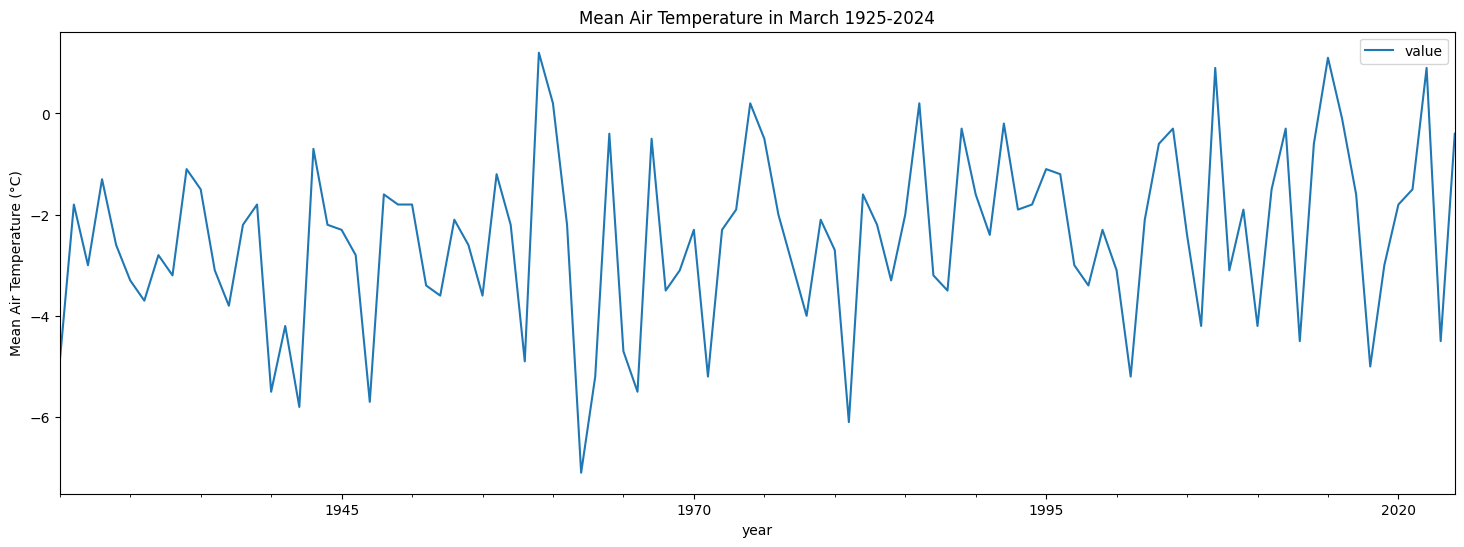

In [133]:
df2[df2['month'] == 'March'].plot(
    x='referenceTime', 
    y='value', 
    kind='line', 
    figsize=(18, 6), 
    title='Mean Air Temperature in March 1925-2024',
    xlabel='year', 
    ylabel='Mean Air Temperature (°C)',
)

<Axes: title={'center': 'Mean Air Temperature in April 1925-2024'}, xlabel='Year', ylabel='Mean Air Temperature (°C)'>

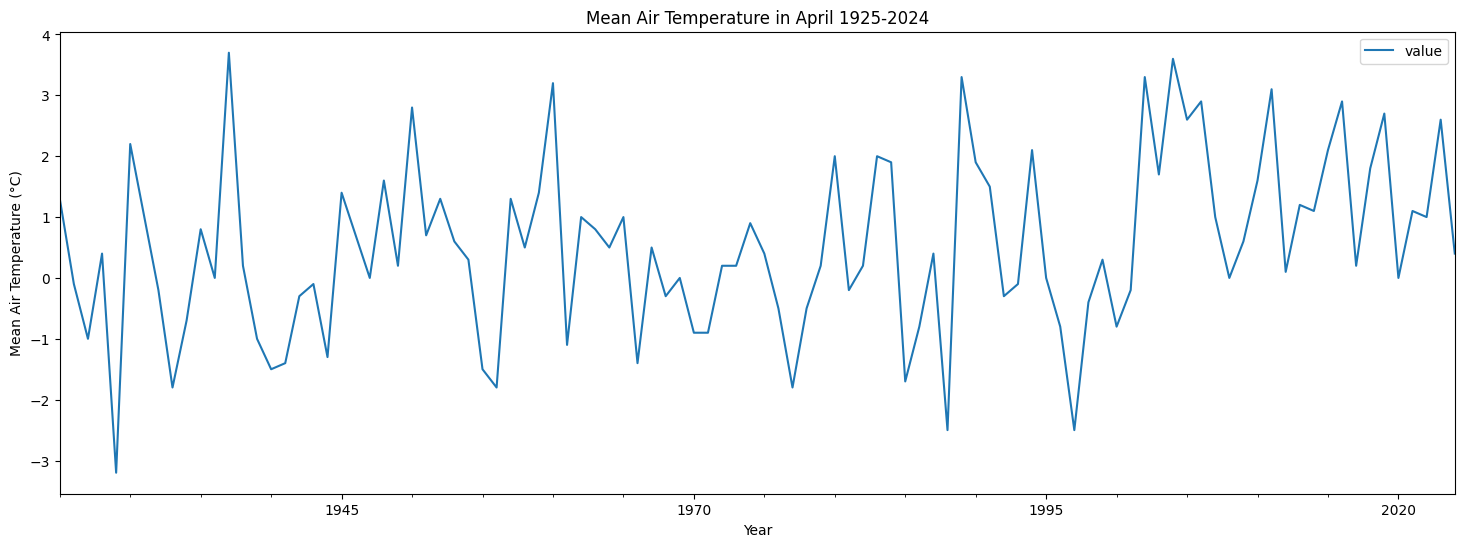

In [134]:
df2[df2['month'] == 'April'].plot(
    x='referenceTime', 
    y='value', 
    kind='line', 
    figsize=(18, 6), 
    title='Mean Air Temperature in April 1925-2024', 
    xlabel='Year', 
    ylabel='Mean Air Temperature (°C)',
)

<Axes: title={'center': 'Mean Air Temperature in February 1925-2024'}, xlabel='Year', ylabel='Mean Air Temperature (°C)'>

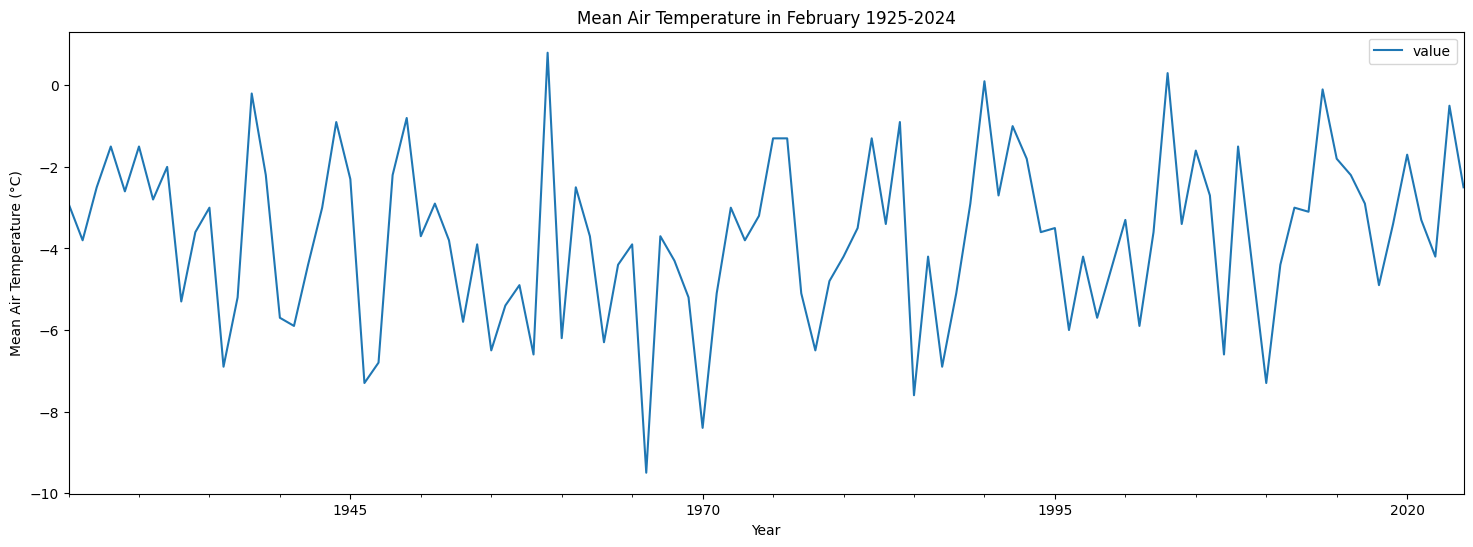

In [135]:
df2[df2['month'] == 'February'].plot(
    x='referenceTime', 
    y='value', 
    kind='line', 
    figsize=(18, 6), 
    title='Mean Air Temperature in February 1925-2024', 
    xlabel='Year', 
    ylabel='Mean Air Temperature (°C)',
)

In [136]:
# Calculate mean for each season
seasonal_mean = df2.groupby('season')['value'].mean().reset_index()

<Axes: title={'center': 'Mean Air Temperature by Winter Season'}, xlabel='Season', ylabel='Mean Air Temperature (°C)'>

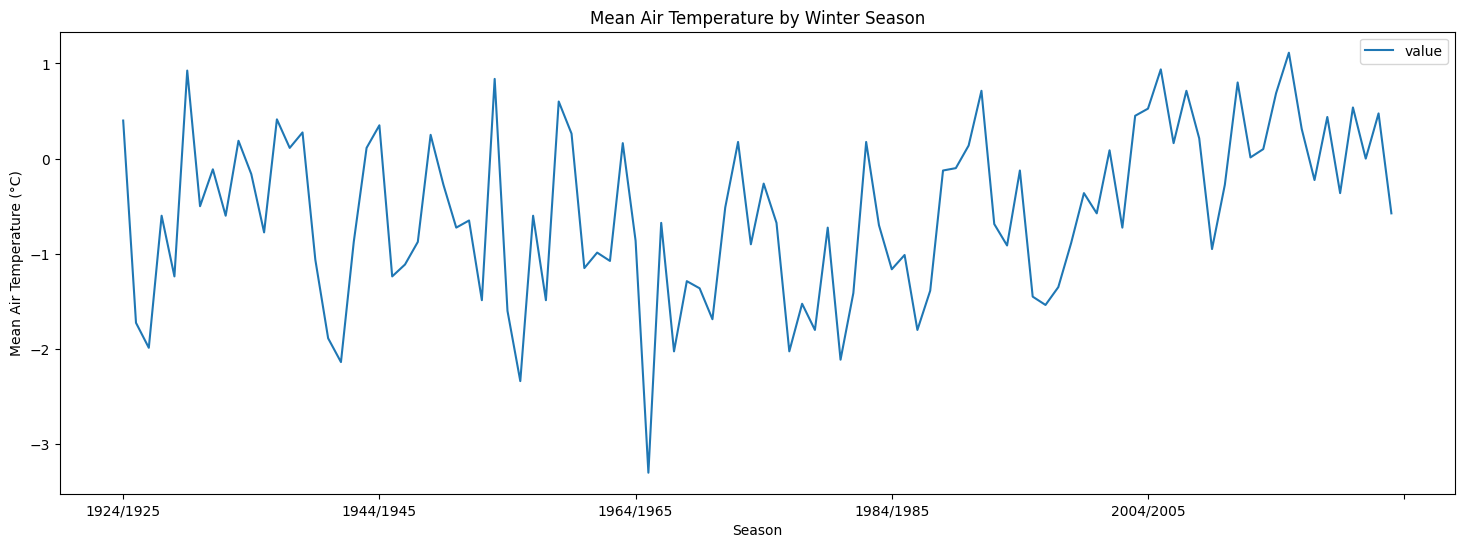

In [137]:
# plot it
seasonal_mean.plot(
    x='season', 
    y='value', 
    kind='line', 
    figsize=(18, 6), 
    title='Mean Air Temperature by Winter Season', 
    xlabel='Season', 
    ylabel='Mean Air Temperature (°C)',
)

In [138]:
seasonal_mean.tail()

,season,value
95,2019/2020,-0.3625
96,2020/2021,0.5375
97,2021/2022,0.0000
98,2022/2023,0.4750
99,2023/2024,-0.5750


In [139]:
df2[df2['season'] == '2021/2022']

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,month,year,season
776,SN90450:0,2021-10-01 00:00:00+00:00,mean(air_temperature P1M),3.4,degC,PT0H,P1M,October,2021,2021/2022
777,SN90450:0,2021-11-01 00:00:00+00:00,mean(air_temperature P1M),-0.1,degC,PT0H,P1M,November,2021,2021/2022
778,SN90450:0,2021-12-01 00:00:00+00:00,mean(air_temperature P1M),-4.4,degC,PT0H,P1M,December,2021,2021/2022
779,SN90450:0,2022-01-01 00:00:00+00:00,mean(air_temperature P1M),-2.8,degC,PT0H,P1M,January,2022,2021/2022
780,SN90450:0,2022-02-01 00:00:00+00:00,mean(air_temperature P1M),-4.2,degC,PT0H,P1M,February,2022,2021/2022
781,SN90450:0,2022-03-01 00:00:00+00:00,mean(air_temperature P1M),0.9,degC,PT0H,P1M,March,2022,2021/2022
782,SN90450:0,2022-04-01 00:00:00+00:00,mean(air_temperature P1M),1.0,degC,PT0H,P1M,April,2022,2021/2022
783,SN90450:0,2022-05-01 00:00:00+00:00,mean(air_temperature P1M),6.2,degC,PT0H,P1M,May,2022,2021/2022


**Note to self:** Use df `seasonal_mean` to make a chart of the temperature

In [140]:
df2.to_csv('airtemperature.csv')

In [141]:
seasonal_mean.to_csv('mean_temp_per_skiseason.csv')